# Tratar o campo 'vacina_dataAplicacao" para fazer Gráficos
o objetivo é nos eixos: 
onde, X = data
      Y = dados acumulados do período mês

In [1]:
import time
import requests 
import pandas as pd
import numpy  as np

from datetime import datetime


# Importar bibliotecas para construir gráficos:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


# Leitura do arquivo de Vacinacao completo selecionando alguns
# campos para pesquisa:

test    = pd.read_csv("BD_Amostra-Alguns-26-05-2021.csv", sep=";")
usecols = ['vacina_fabricante_nome',
                 'paciente_idade',
                 'paciente_id',
                 'vacina_dataAplicacao',
                 'paciente_endereco_uf',
                 'vacina_descricao_dose']

                 
               

# No programa Primeira-Segunda-Doses, temos o resultado
do número de brasileiros que se vacinaram com a 
Primeira_Dose e/ou Segunda_Dose da vacina.

Com o campo "vacina_dataAplicacao", teremos duas informações importantes:
1) Se a pessoa foi totalmente vacinada - com as duas doses;     
2) Como está ocorrendo a vacinação diária e acumulumar esse dado mensal;   
3) Fazendo uma Regresão ML, teremos uma estimativa de quando a população
    brasileira será vacinada

In [2]:

test["vacina_dataAplicacao"].unique()

array(['2021-03-19T00:00:00.000Z', '2021-03-03T00:00:00.000Z',
       '2021-03-09T00:00:00.000Z', '2021-04-01T00:00:00.000Z',
       '2021-03-25T00:00:00.000Z', '2021-04-20T00:00:00.000Z',
       '2021-03-20T00:00:00.000Z', '2021-03-30T00:00:00.000Z',
       '2021-04-07T00:00:00.000Z', '2021-02-11T00:00:00.000Z',
       '2021-03-27T00:00:00.000Z', '2021-03-15T00:00:00.000Z',
       '2021-04-04T00:00:00.000Z', '2021-04-17T00:00:00.000Z',
       '2021-04-02T00:00:00.000Z', '2021-03-12T00:00:00.000Z',
       '2021-03-29T00:00:00.000Z', '2021-03-23T00:00:00.000Z',
       '2021-04-16T00:00:00.000Z', '2021-03-05T00:00:00.000Z',
       '2021-04-05T00:00:00.000Z', '2021-04-15T00:00:00.000Z',
       '2021-04-19T00:00:00.000Z', '2021-04-09T00:00:00.000Z',
       '2021-04-08T00:00:00.000Z', '2021-01-29T00:00:00.000Z',
       '2021-02-12T00:00:00.000Z', '2021-04-21T00:00:00.000Z',
       '2021-03-24T00:00:00.000Z', '2021-03-26T00:00:00.000Z',
       '2021-03-28T00:00:00.000Z', '2021-01-21T00:00:00

# Preparando o campo "vacina_dataAplicacao para o datetime:

### Formato vacina_dataAplicao" = 2021-02-23T00:00:00.000Z;SP; 

In [3]:

test['vacina_dataAplicacao'] = pd.to_datetime(test['vacina_dataAplicacao'], 
      format = "%Y-%m-%dT%H:%M:%S")

# Criar um "pivot table" onde:
## linhas = as datas
## colunas = acumulado das vacinas

In [4]:
# Criar uma coluna com Número 1, para contar o Total Acumulado de cada vacina

test["counter"] = 1

pivot_test = pd.pivot_table(test, 
                            index="vacina_dataAplicacao", 
                            columns = 'vacina_fabricante_nome',
                            values="counter",
                            aggfunc="sum",
                            fill_value=0)
pivot_test = pivot_test.reset_index()


In [6]:
# Pivot test será criado para ter o total de vacinados entre 
# 19/01/2021 e 26/05/2021

In [7]:

pivot_test = pivot_test.loc[(pivot_test["vacina_dataAplicacao"]>="2021-01-01") &
            (pivot_test["vacina_dataAplicacao"]<"2021-05-26")].reset_index(drop=True)

In [8]:

for vacina_fabricante_nome in pivot_test.columns[1:]:
    pivot_test[f"{vacina_fabricante_nome}_acumulado"] = pivot_test[vacina_fabricante_nome].cumsum()
    

# Criar um "pivot table" onde:
    linhas = as datas
    colunas = acumulado das vacinas
    

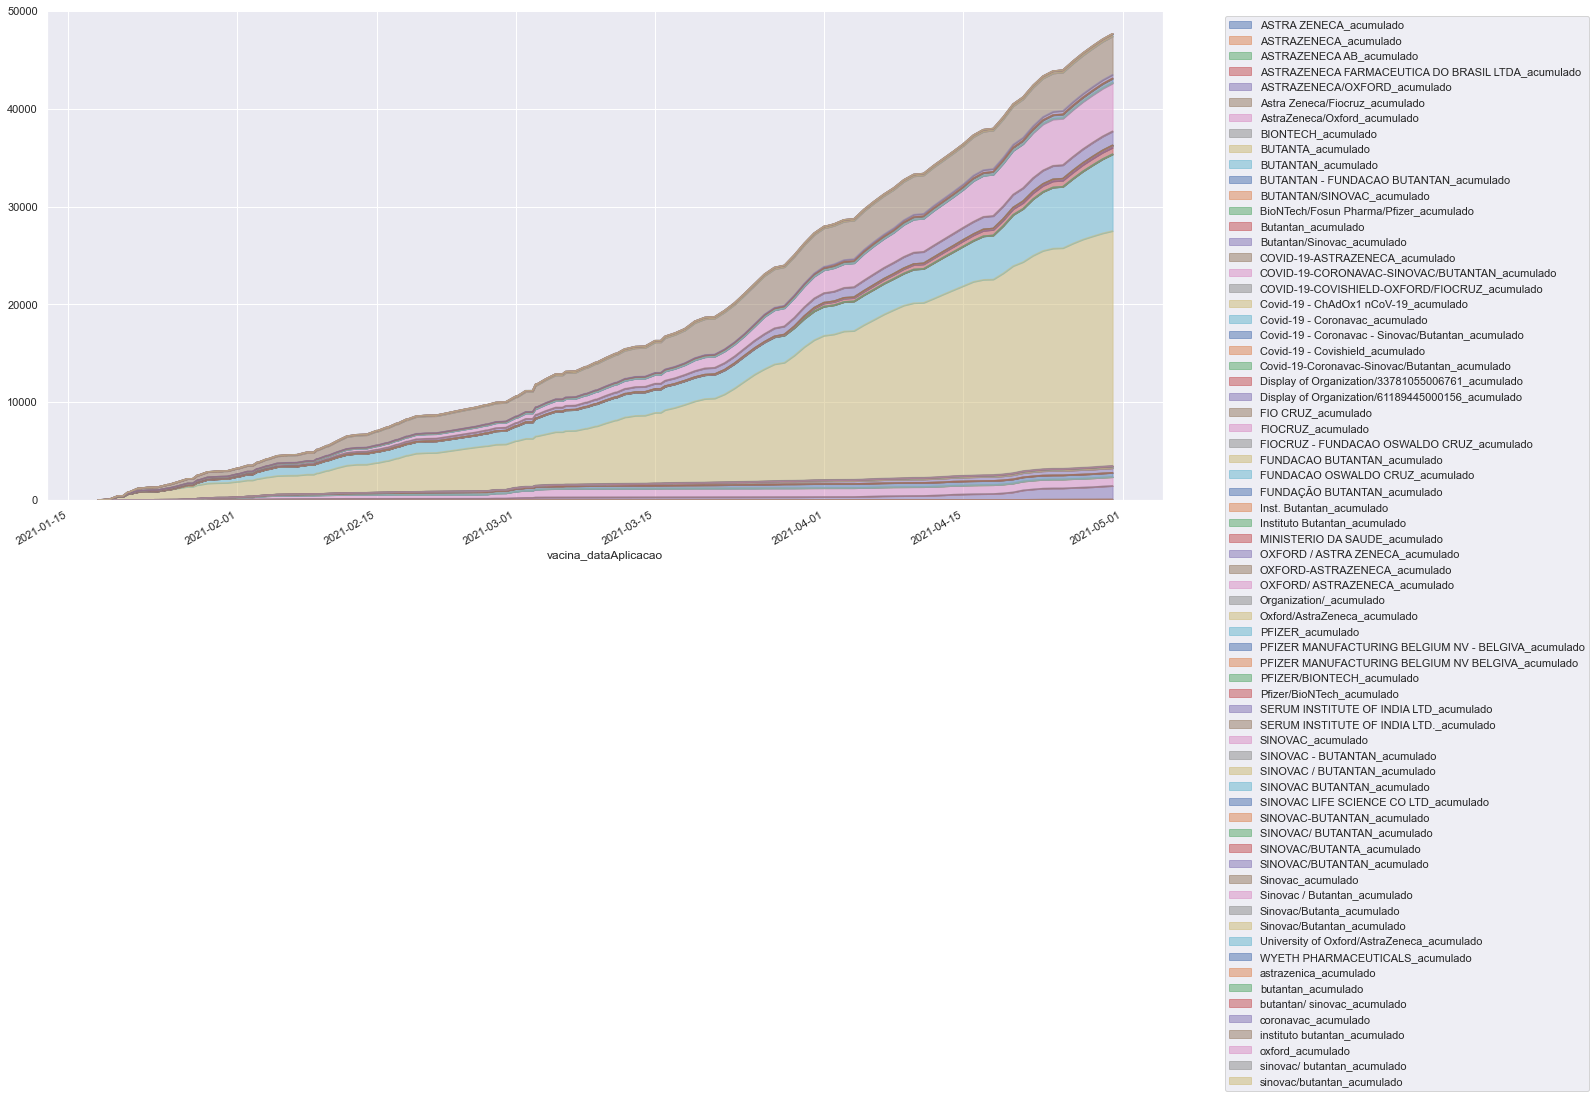

In [9]:

columns_to_plot = [w for w in pivot_test.columns
                  if "acumulado" in w]

# Faço o plot:
(pivot_test
 
 .set_index("vacina_dataAplicacao")
 .loc[:,columns_to_plot]
 .plot(kind="area", stacked=True, figsize=(20,10), alpha=.5))

# Somente tirando a legenda para fora do gráfico

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1))